# Read Data and PreCheck

In [2]:
import numpy as np
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("dataset/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.isna().sum()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


- Tidak terdapat missing value
- Dataset drug200.csv terdiri dari 6 column dan 200 baris

# Variable Description

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Univariate Variable Analysis

### Age Variable

In [7]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

Max Age: 74
Min Age: 15


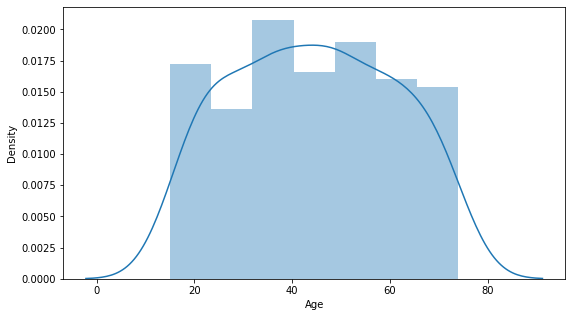

In [8]:
# Age distribution
plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

- Age memiliki rentang nilai dari 15 sampai 74

### Sex Variable

In [9]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

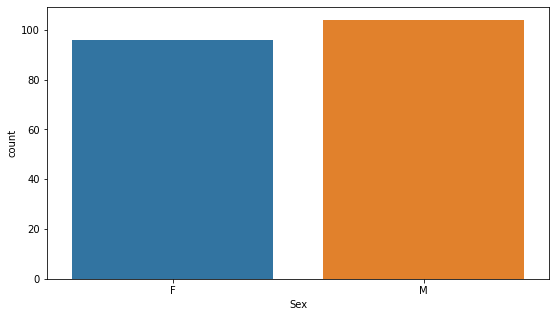

In [10]:
# Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

### BP Variable

In [11]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

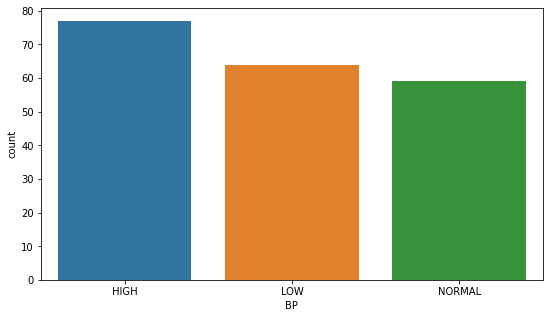

In [12]:
# Blood Pressure Levels (BP) distribution
plt.figure(figsize = (9,5))
sns.countplot(df.BP)
plt.show()

### Cholesterol Variable

In [13]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

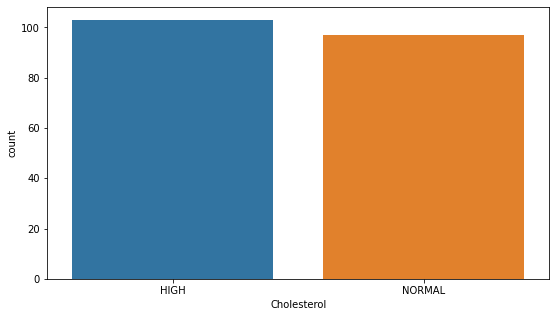

In [14]:
plt.figure(figsize = (9,5))
sns.countplot(df.Cholesterol)
plt.show()

### Na_to_K Variable

In [15]:
print("Max Na_to_K:",df.Na_to_K.max())
print("Min Na_to_K:",df.Na_to_K.min())
print("Mean Na_to_K:",df.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.084485


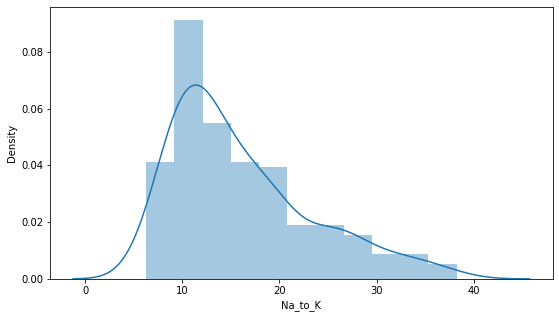

In [16]:
plt.figure(figsize = (9,5))
sns.distplot(df.Na_to_K)
plt.show()

### Drug Variable

In [17]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

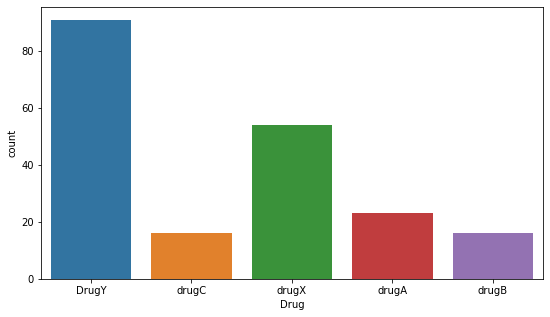

In [18]:
plt.figure(figsize = (9,5))
sns.countplot(df.Drug)
plt.show()

- data jenis drug terlihat imbalance, dimana DrugY mendominasi distribusi data target.
- Oleh karenanya dalam proses mengestimasi parameter perlu menggunakan cross-validation

# Basic Data Analysis

## Age -- Drug

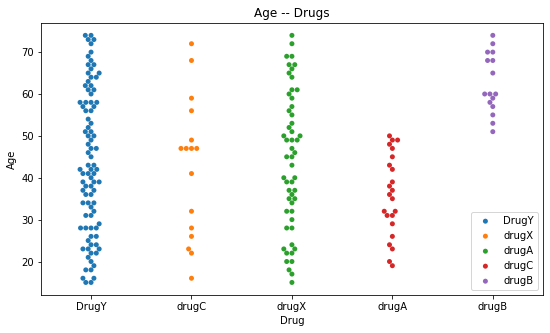

In [19]:
plt.figure(figsize=(9,5))
sns.swarmplot(x = "Drug", y = "Age", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drugs")
plt.show()

In [20]:
print("Minimum Age of DrugB", df.Age[df.Drug == "drugB"].min())
print("Minimum Age of DrugA", df.Age[df.Drug == "drugA"].min())

Minimum Age of DrugB 51
Minimum Age of DrugA 19


In [21]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


Dari visualisasi diatas didapatkan bahwa
- drugB hanya dikonsumsi oleh pasien berumur 51 tahun keatas
- drugA hanya dikonsumsi oleh pasien berumur 50 tahun kebawah

## Sex -- Drug

In [22]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


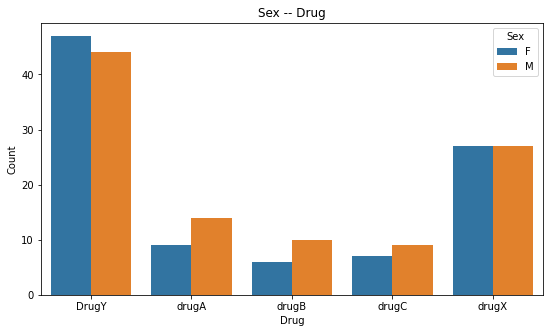

In [23]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

## BP -- Drug

In [24]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


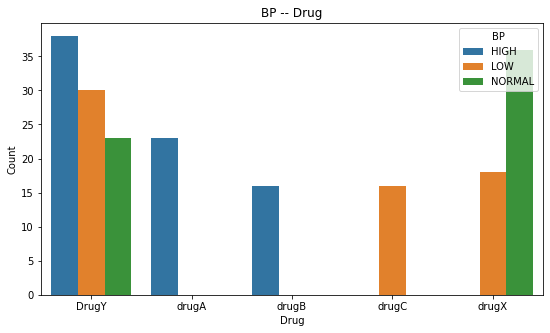

In [25]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

## Na_to_K -- Drug

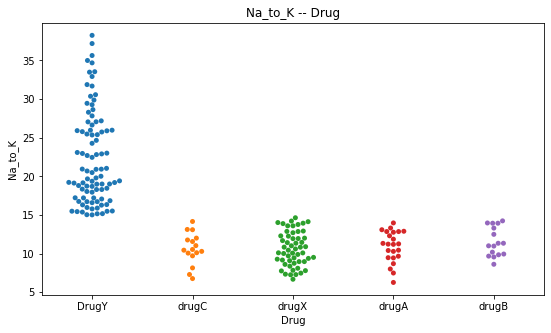

In [32]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Na_to_K -- Drug")
plt.show()

In [27]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


## Cholesterol -- Drug

In [28]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


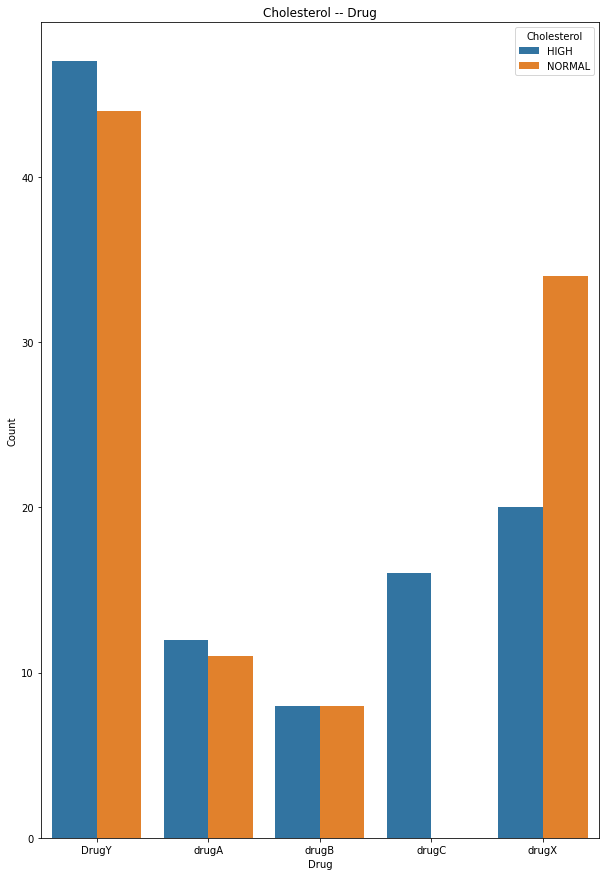

In [29]:
plt.figure(figsize = (10,15))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

# Preparing Data and Feature Engineering

## Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [31]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [32]:
label_list = ["Sex","BP","Cholesterol","Drug"]

for l in label_list:
    label_encoder(l)

In [33]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [34]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Training the Naive Bayes model

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Predicting the Test set results

In [37]:
y_pred = classifier.predict(X_test)
y_pred

array([4, 0, 4, 3, 0, 4, 4, 3, 3, 0, 4, 3, 0, 0, 1, 1, 4, 4, 2, 1, 4, 4,
       4, 3, 2, 4, 4, 0, 3, 4, 3, 3, 0, 0, 1, 0, 1, 0, 0, 0])

### Making the Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  1  0  4  0]
 [ 0  4  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]


0.875

## Training the Decision Tree Classification model

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf = classifier.fit(X_train, y_train)

### Predicting a new result

In [40]:
# print(classifier.predict(sc.transform([[,]])))

### Predicting the Test set results

In [41]:
y_pred = classifier.predict(X_test)
y_pred

array([4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, 1, 4, 4, 2, 0, 4, 4,
       4, 0, 2, 4, 4, 0, 3, 4, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[17  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]


1.0

### Tree Visualization

[Text(871.875, 978.48, 'X[4] <= 14.839\nentropy = 1.971\nsamples = 160\nvalue = [74, 19, 14, 12, 41]'),
 Text(697.5, 761.0400000000001, 'X[2] <= 0.5\nentropy = 1.814\nsamples = 86\nvalue = [0, 19, 14, 12, 41]'),
 Text(348.75, 543.6, 'X[0] <= 50.0\nentropy = 0.983\nsamples = 33\nvalue = [0, 19, 14, 0, 0]'),
 Text(174.375, 326.1600000000001, 'entropy = 0.0\nsamples = 19\nvalue = [0, 19, 0, 0, 0]'),
 Text(523.125, 326.1600000000001, 'entropy = 0.0\nsamples = 14\nvalue = [0, 0, 14, 0, 0]'),
 Text(1046.25, 543.6, 'X[2] <= 1.5\nentropy = 0.772\nsamples = 53\nvalue = [0, 0, 0, 12, 41]'),
 Text(871.875, 326.1600000000001, 'X[3] <= 0.5\nentropy = 0.996\nsamples = 26\nvalue = [0, 0, 0, 12, 14]'),
 Text(697.5, 108.72000000000003, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(1046.25, 108.72000000000003, 'entropy = 0.0\nsamples = 14\nvalue = [0, 0, 0, 0, 14]'),
 Text(1220.625, 326.1600000000001, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 0, 27]'),
 Text(1046.25, 761.04000000

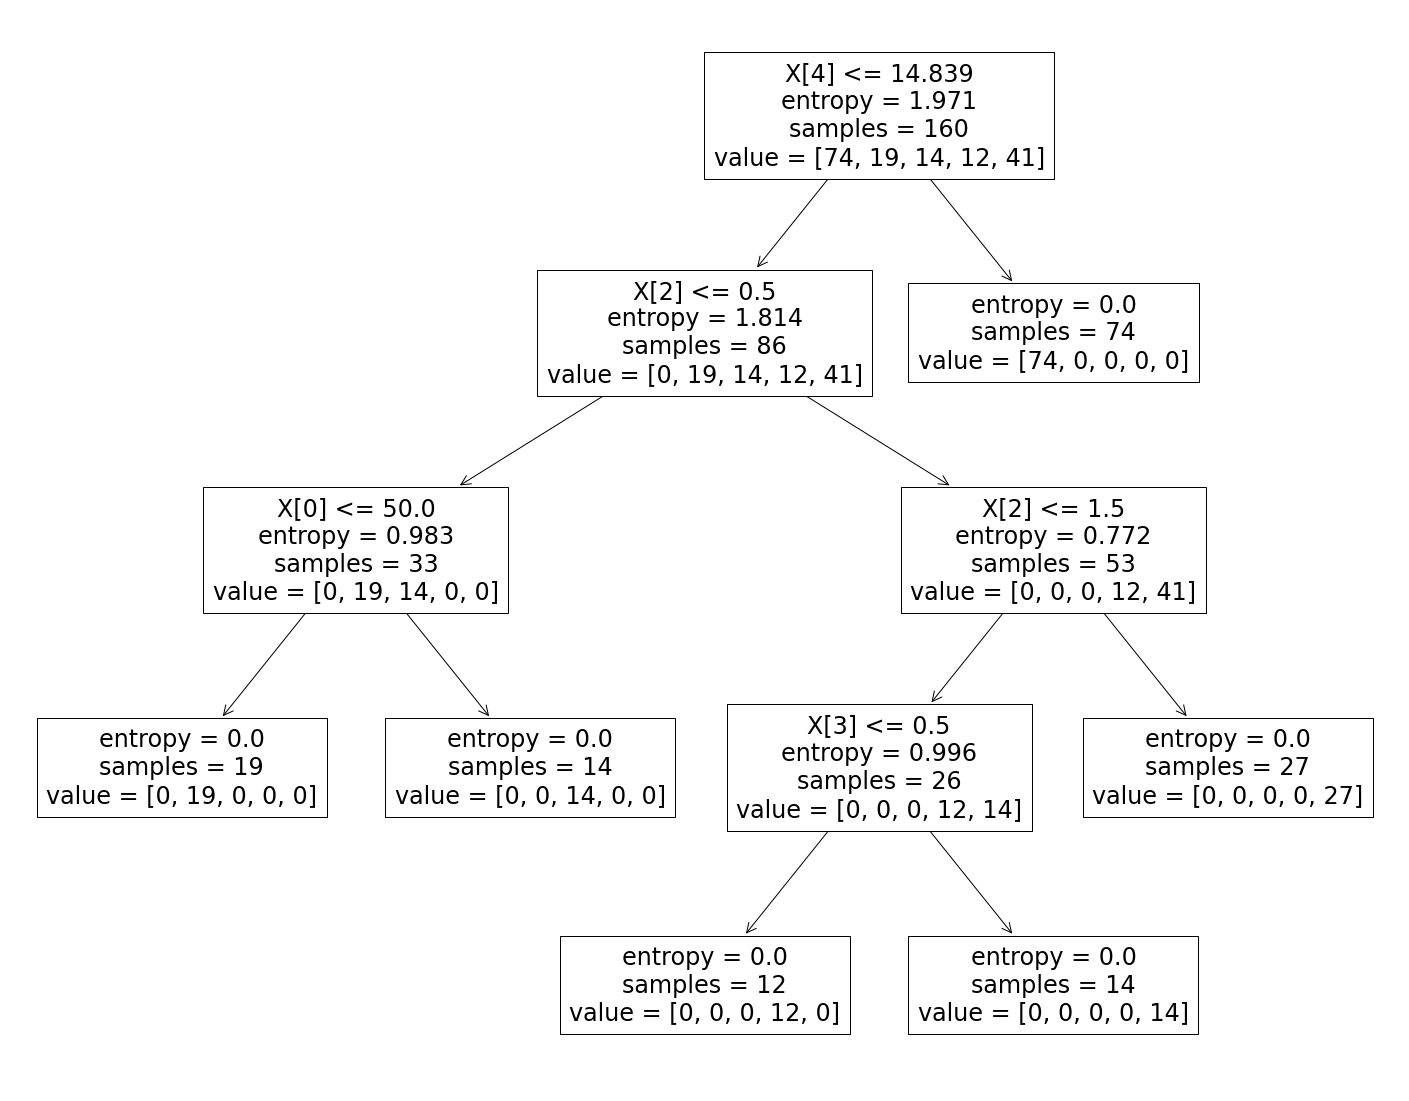

In [43]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)

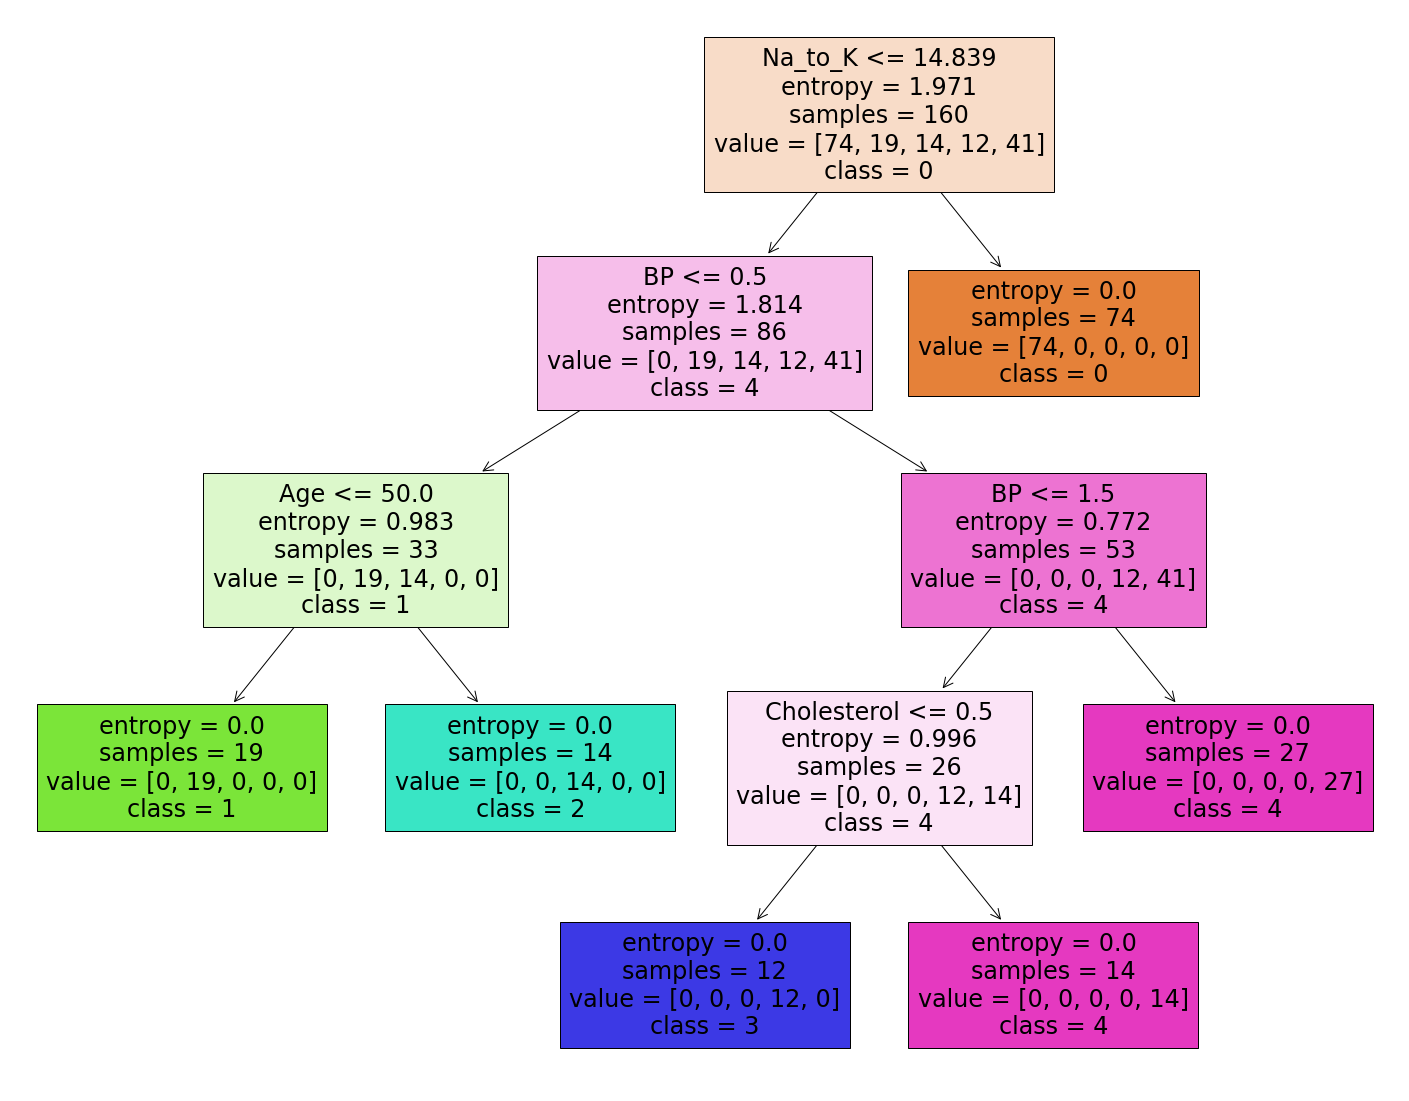

In [44]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list(df.columns[:-1]),  
                   class_names=[str(i) for i in list(set(df.Drug))],
                   filled=True)

KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve , classification_report

In [46]:
from imblearn import over_sampling , under_sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resambled , y_resampled = ros.fit_resample(X,y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resambled, y_resampled, test_size=0.20, random_state=101)

In [48]:
# Now we are going to make for loop to get the best K value : 

test_error_rate = []

for k in range (1,30): 
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train , y_train)
    y_pred = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test , y_pred)
    test_error_rate.append(test_error)

Text(0.5, 1.0, 'Get The Best K Value VS Test_error_Rate')

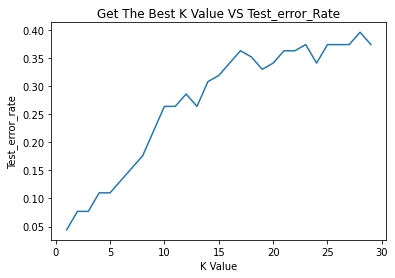

In [49]:
plt.plot(range(1,30), test_error_rate)
plt.ylabel('Test_error_rate')
plt.xlabel('K Value')
plt.title('Get The Best K Value VS Test_error_Rate')

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
# Now lets diefine a function that will calculate needed metrics to avoid doing it on the upcoming algorithms D:

def metrics_needed (model):
    y_pred = model.predict(X_test)
    
    print('/n')
    
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(model , X_test , y_test)

/n
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        16
           4       0.89      1.00      0.94        17

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.95        91



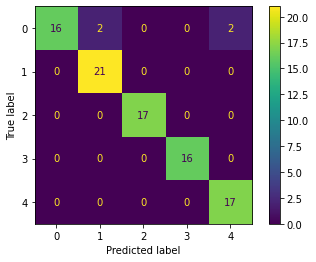

In [52]:
metrics_needed(knn_model)

SVM Algorithm

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [54]:
svc = SVC()
param_grid = {'C':[0.001,0.01,1]}

In [55]:
grid_model = GridSearchCV(svc,param_grid)

In [56]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 1]})

In [57]:
grid_model.best_params_

{'C': 1}

/n
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.51      0.86      0.64        21
           2       0.54      0.88      0.67        17
           3       0.50      0.44      0.47        16
           4       0.00      0.00      0.00        17

    accuracy                           0.59        91
   macro avg       0.51      0.58      0.52        91
weighted avg       0.53      0.59      0.54        91



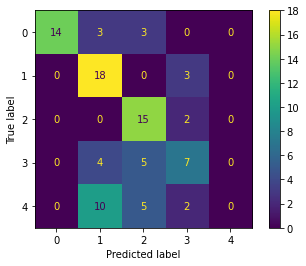

In [58]:
metrics_needed(grid_model)

Random Forest Classifier Algorithm

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
random_model = RandomForestClassifier(n_estimators=10 , max_features='auto',random_state=101)

In [61]:
random_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

/n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        17

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



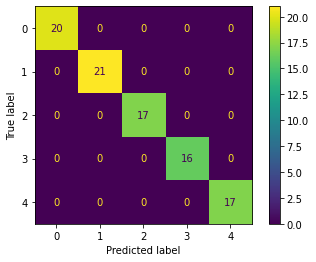

In [62]:
metrics_needed(random_model)